<span style="font-size: 40pt;">Student Performance Indicator</span>


<span style="font-size: 20pt;">Life Cycle Of Machine Learning Project</span>


1.Understanding the Problem Statement<br>
2.Data Collection<br>
3.Data Checks to Perform<br>
4.Exploratory data analysis<br>
5.Data Pre-Processing<br>
6.Model Training<br>
7.choose bestModel


<span style="font-size: 25pt;">1) Problem Statement</span>


<span style="font-size: 15pt;">This project understands how the student's performance(test Scores) is affected by other variables such as Gender,ethnicity,Parental level of education,Lunch and Test Preparation course.</span>


<span style="font-size: 25pt;">2)Data Collection</span>



1.Dataset Source-https://www.kaggle.com/code/chingchunyeh/students-performance-in-exams?datasetid=74977<br>
2.The data consists of 8 column and 1000 rows

<span style="font-size: 20pt;">2.1 Import data and Required Packages</span>


<span style="font-size: 15pt;">Importing Pandas ,Numpy,Matplotlib,Seaborn and Warinigs Library</span>


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<span style="font-size: 16pt;">Import the CSV data as Pandas DataFrame</span>


In [32]:
df=pd.read_csv('stud.csv')

<span style="font-size: 16pt;">Show top 5 records</span>


In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<span style="font-size: 16pt;">Shape Of The dataset</span>


In [34]:
df.shape

(1000, 8)

<span style="font-size: 16pt;">Dataset Information</span>


gender : sex of students -> (Male/Female)<br>
race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)<br>
parental level of education : parents' final education -> (bachelors degree,some college,masters degree,associate's degree.high scholl)<<br>
lunch : having lunch before test (normal or abnormal)<br>
test preparation course : complete or not complete before test<br>
math score<br>
reading score<br>
writing score

<span style="font-size: 16pt;">3.Data Checks tp Perform</span>


1.Check Missing Values<br>
2.Check Duplicates<br>
3.Check datatype<br>
4.Check the number of unique values of each column<br>
5.Check statistics of data set<br>
6.Check various categories present in the different categorical column


<span style="font-size: 16pt;">3.1 Check Missing Values</span>


In [35]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<span style="font-size: 13pt;">There are no missing values in the data set</span>


<span style="font-size: 16pt;">3.2 Check Duplicates</span>


In [36]:
df.duplicated().sum()

0

<span style="font-size: 13pt;">There are no duplicate values in the dataset</span>


<span style="font-size: 16pt;">3.3 Check data types</span>



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<span style="font-size: 16pt;">3.4 Checking the number of unique values of each column</span>


In [38]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<span style="font-size: 16pt;">3.5 Check Statistics of data set</span>


In [39]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<span style="font-size: 16pt;">Insight</span>


1.From above description of numercal dats,all means we are very close to each other- between 66 and 68.05<br>
2.All standard deviations are also close -between 14.6 and 15.19<br>
3.While there is a minimum score 0 for math ,for writing is much higher =10 and for reading =17

<span style="font-size: 16pt;">3.6 Exploring Data</span>



In [40]:
print("categories in 'gender' variable:  ",end="")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:  ",end="")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education' variable:  ",end="")
print(df['parental level of education'].unique())

print("categories in 'lunch' variable:  ",end="")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:  ",end="")
print(df['test preparation course'].unique())

categories in 'gender' variable:  ['female' 'male']
categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test preparation course' variable:  ['none' 'completed']


In [41]:
## numerical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

##print columns
print('We have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features:{}'.format(len(categorical_features),categorical_features))

We have 3 numerical features:['math score', 'reading score', 'writing score']
We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


<span style="font-size: 16pt;">3.7 Adding columns for "Total Score" and "Average"</span>


In [42]:
df['totalScore']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['totalScore']/3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totalScore,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:

reading_full=df[df['reading score']==100]['Average'].count()
writing_full=df[df['writing score']==100]['Average'].count()
math_full=df[df['math score']==100]['Average'].count()


print(f'Number of students with full marks in maths:{math_full}')
print(f'Number of students with full marks in writing:{writing_full}')
print(f'Number of students with full marks in reading:{reading_full}')




Number of students with full marks in maths:7
Number of students with full marks in writing:14
Number of students with full marks in reading:17


<span style="font-size: 16pt;">Insights</span>


From the above values we observe that students have performed worst in Maths<br>
Best Performance is in reading section

<span style="font-size: 16pt;">4. Exploring Data (Visualization)</span>


<span style="font-size: 16pt;">4.1 Visualize average score distrubution to make some conclusion</span>


1.Histogram<br>
2.Kernal Distrubution Function(KDE)

<span style="font-size: 16pt;">4.1.1 Histogram & KDE</span>


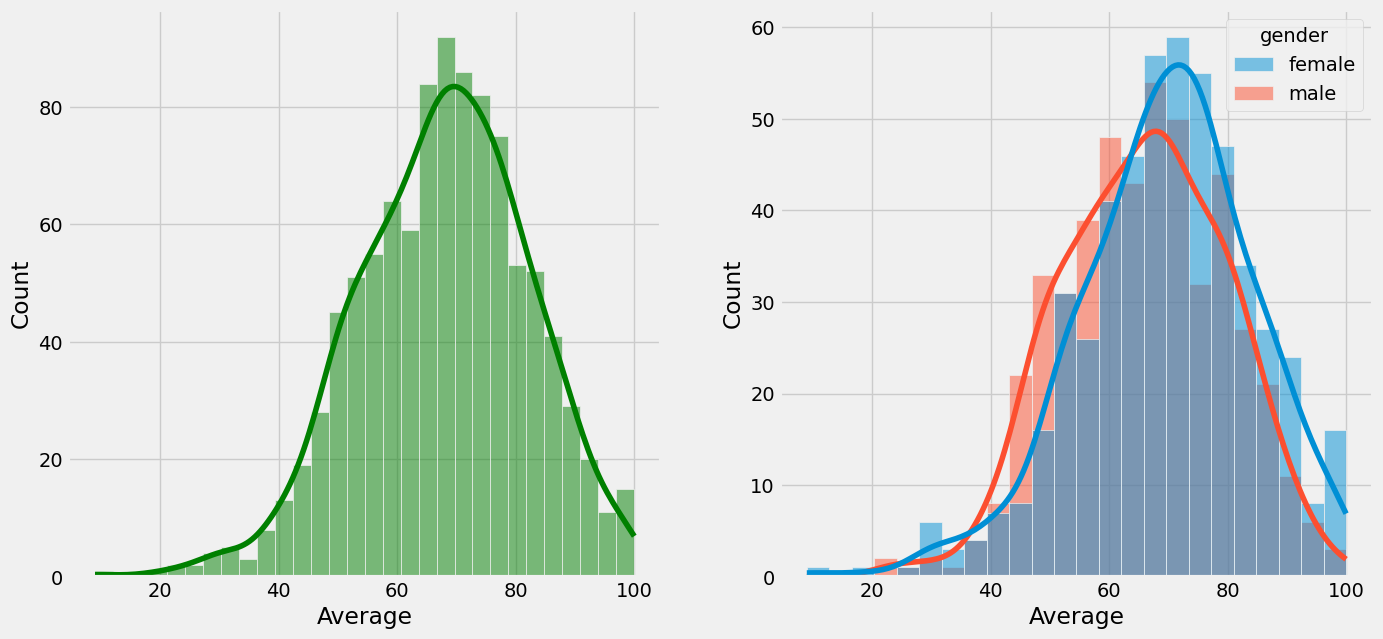

In [44]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

<span style="font-size: 16pt;">Insights</span>


Female students tend to perform well then male students<br>

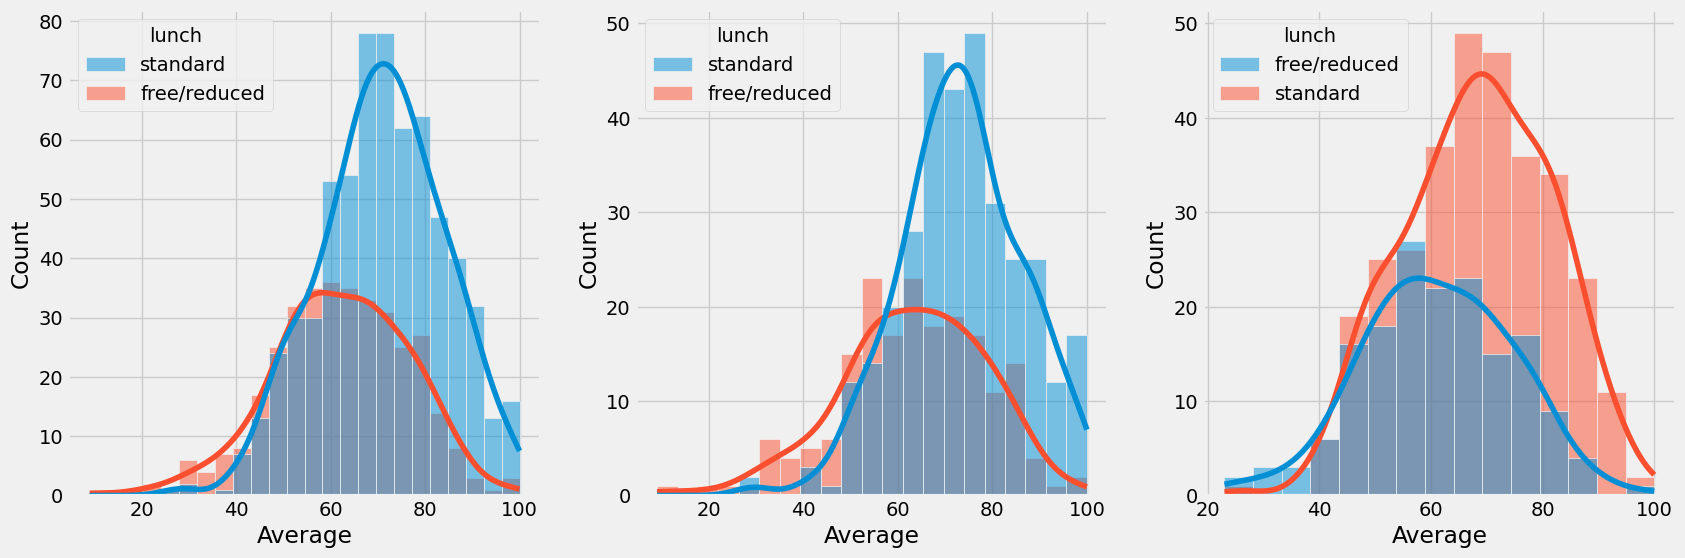

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()



<span style="font-size: 16pt;">Insights</span>



1.Standard lunch helps perform well in exams<br>
2.Standard lunch helps perform well in  exams be it a male or female

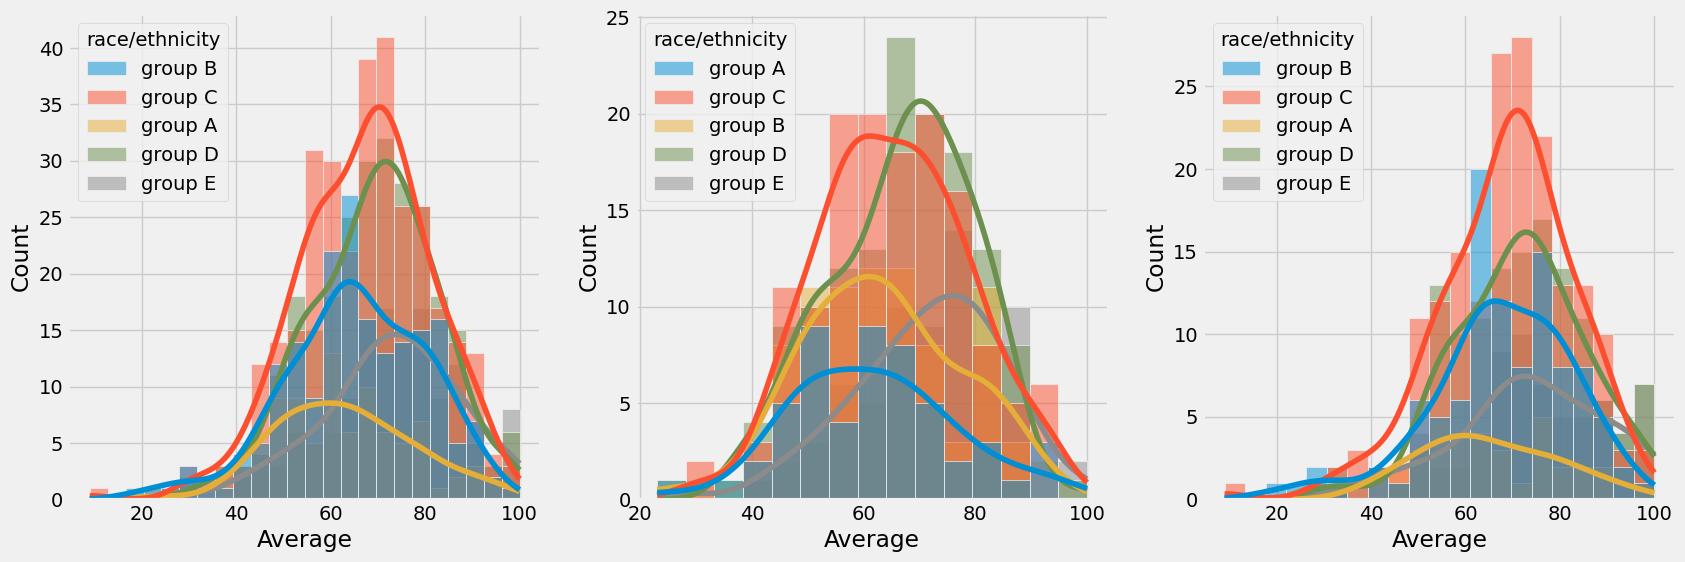

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.show()


<span style="font-size: 16pt;">Insights</span>


1.Students of group A and group B tends to perform pooorly in exam<br>
2.Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

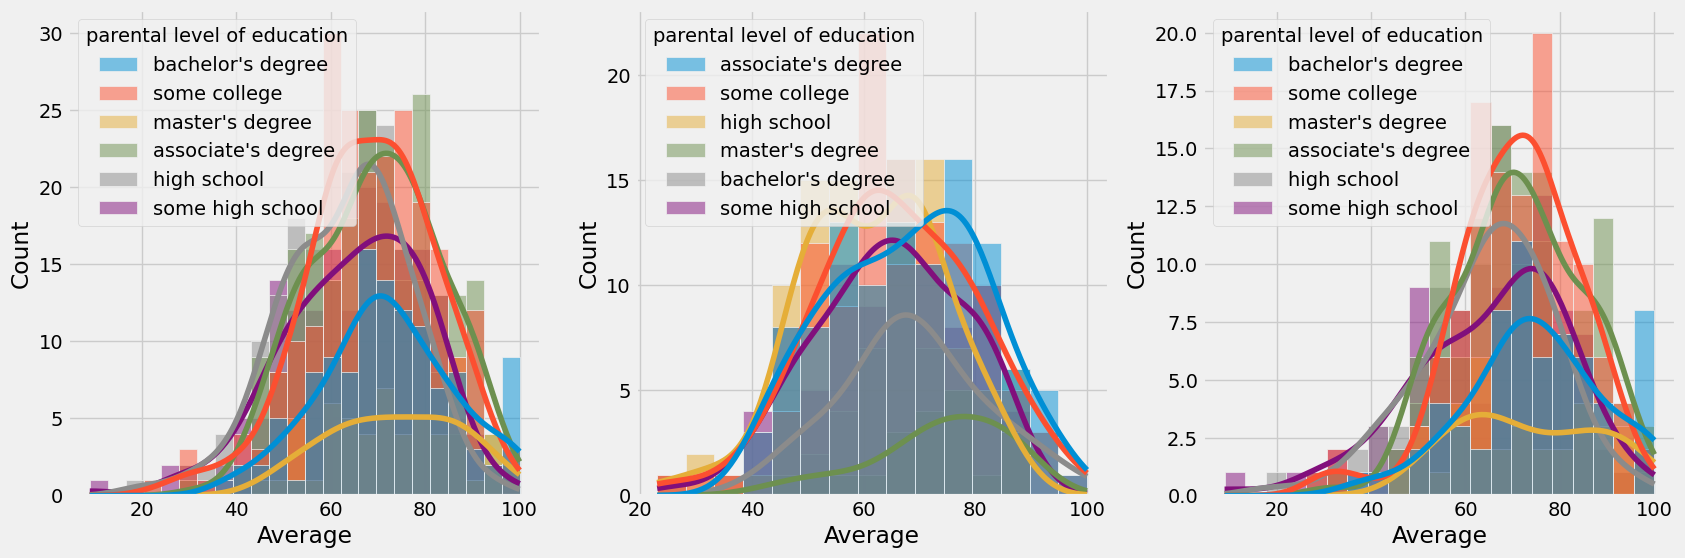

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()


<span style="font-size: 16pt;">Insights</span>


1.In genral Parent's education does'nt help students perform well in exam<br>
2.2nd plot shows that parent's whose education is of associate degree or master's degree their male children doesn't perform well in exam<br>
3.3rd plot we can see there is effect of parents education on female students

<span style="font-size: 16pt;">4.2 Maximum score of students in all three subjects</span>


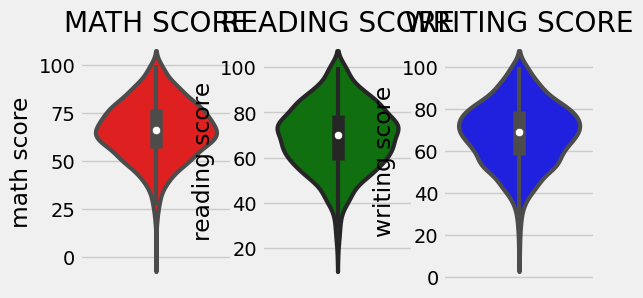

In [48]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 4, 1)
plt.title('MATH SCORE')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORE')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)  # Changed from 1 to 3
plt.title('WRITING SCORE')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

plt.show()


<span style="font-size: 16pt;">Insights</span>


<span style="font-size: 13pt;">From the abive three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score fiorm 50-80</span>


<span style="font-size: 16pt;">4.3 Multivariate analysis using pieplot</span>


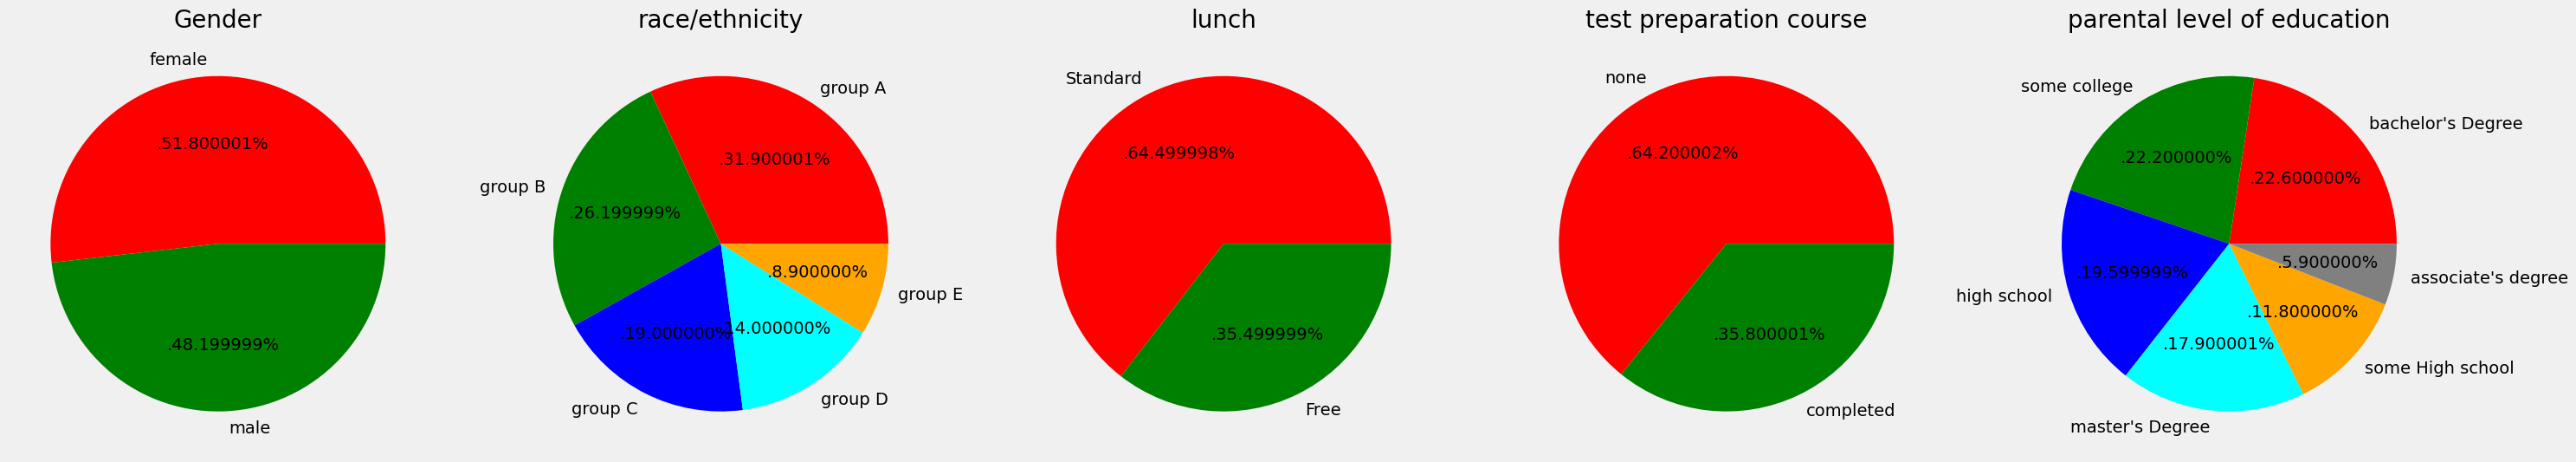

In [49]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='female','male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='none','completed'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test preparation course',fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels="bachelor's Degree",'some college','high school',"master's Degree",'some High school',"associate's degree"
color=['red','green','blue','cyan','orange','grey']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental level of education',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels='group A','group B','group C','group D','group E'
color=['red','green','blue','cyan','orange']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()



<span style="font-size: 16pt;">Insights</span>


1.Number of Male and Female students are almost equal<br>
2.Number of Students are greatest in Group C<br>
3.Number of Students who have standard lunch are better<br>
4.Number of Students who have not enrolled in any test preparation course is greater<b>

<span style="font-size: 16pt;">4.4 Feature Wise Visualization</span>


<span style="font-size: 13pt;">4.4.1 GENDER COLUMN</span>


1.How is Distrubution of Gender?<br>
2.is gender has any impact on students performance?

<span style="font-size: 16pt;">UNIVARIATE ANALYSYS(How is distribution of Gender?)</span>


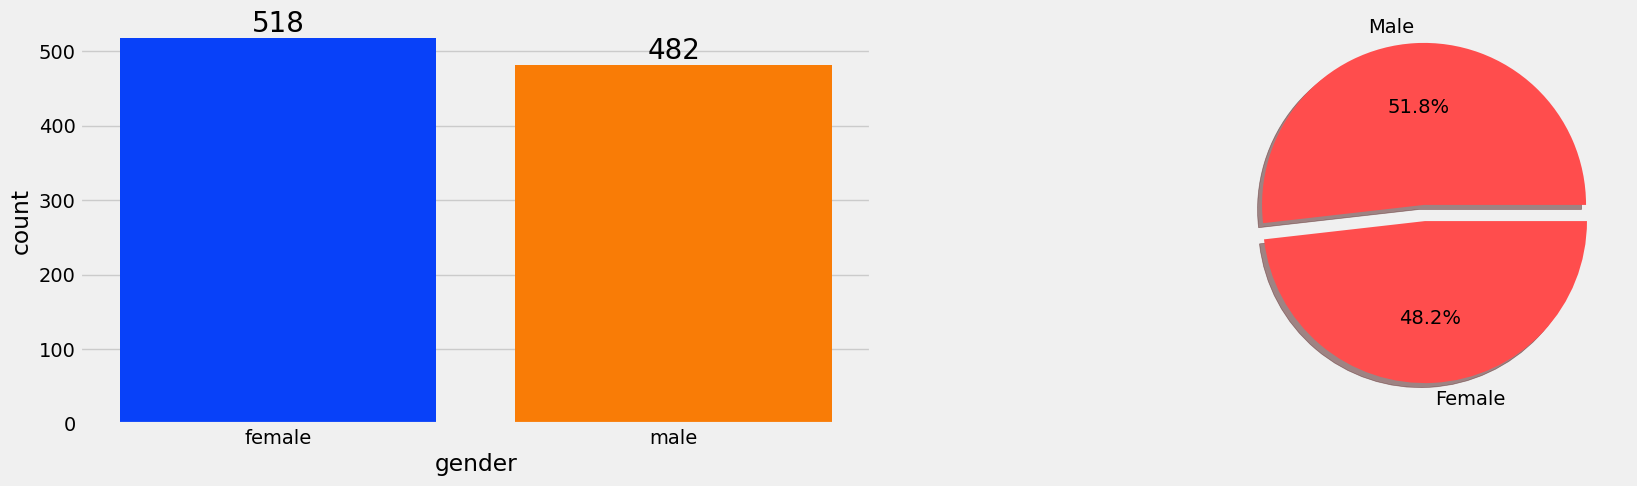

In [50]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

explode_values = (0.1, 0)  # Explode the first wedge (Male) by 10%

plt.pie(
    x=df['gender'].value_counts(),
    labels=['Male', 'Female'],
    explode=explode_values,
    shadow=True,
    colors=['#ff4d4d'],
    autopct='%1.1f%%'  # Display percentages with one decimal point
)
plt.show()



<span style="font-size: 16pt;">Insights</span>


Gender has balanced data with female students are 518(48%) and male students are 482(52%)

<span style="font-size: 16pt;">BIVARIATE ANALYSIS (is gender has any impact on student's performance?)</span>


In [51]:
import pandas as pd

# Assuming these are the columns you want to include in the calculation
numeric_columns = ['math score', 'reading score', 'writing score']

# Now you can proceed with the groupby and mean calculation
gender_group = df.groupby('gender')[numeric_columns].mean()


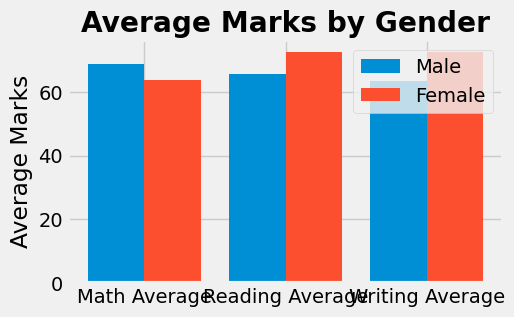

In [52]:
plt.figure(figsize=(5, 3))

x = ['Math Average', 'Reading Average', 'Writing Average']

female_scores = [gender_group.loc['female', 'math score'], gender_group.loc['female', 'reading score'], gender_group.loc['female', 'writing score']]
male_scores = [gender_group.loc['male', 'math score'], gender_group.loc['male', 'reading score'], gender_group.loc['male', 'writing score']]

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(x_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(x_axis, x)
plt.ylabel("Average Marks")
plt.title("Average Marks by Gender", fontweight='bold')
plt.legend()
plt.show()


<span style="font-size: 16pt;">Insights</span>


1.On an average female students have a better overall score then men<br>
2.whereas male have scored highest in Maths

<span style="font-size: 16pt;">4.4.2 RACE/EHNICITY COLUMN</span>


1.How the Group wise distubution ?<br>
2.is Race/Ehnicity has any impact on student's performance

<span style="font-size: 16pt;">UNIVARIATE ANALYSIS (How is Group wise distubution?)</span>


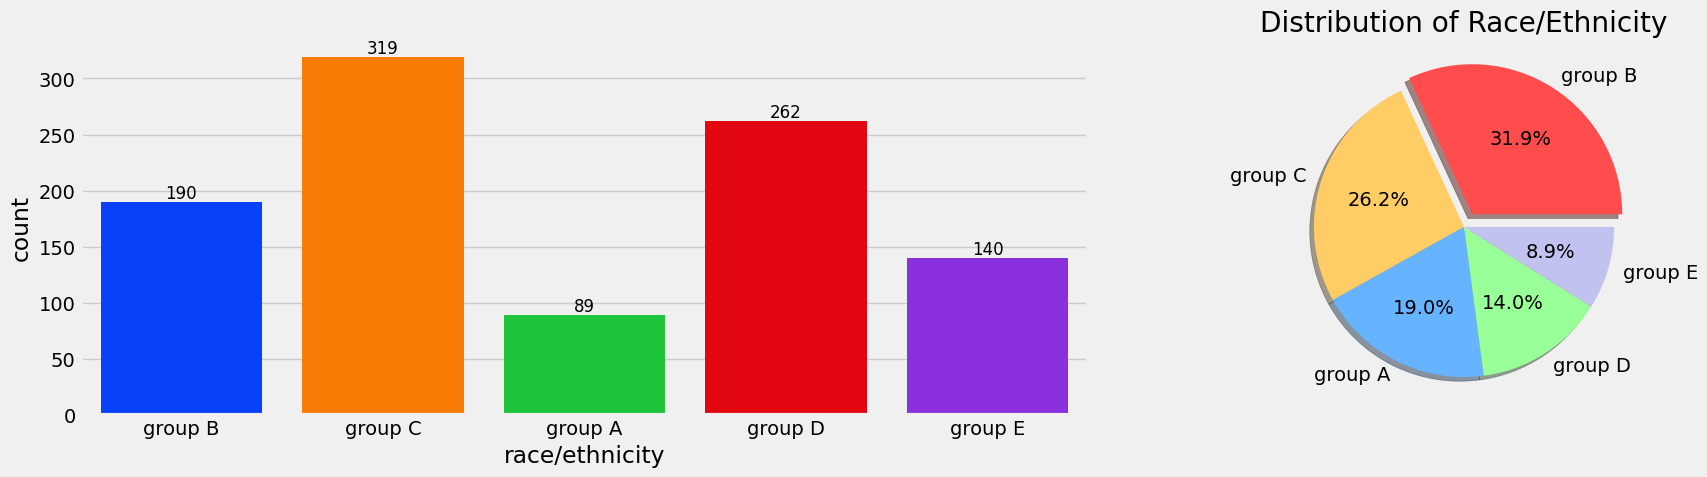

In [53]:


f, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)  # Adjust the label size as needed

explode_values = (0.1, 0, 0, 0, 0)  # Explode the first wedge (Male) by 10%

ax[1].pie(
    x=df['race/ethnicity'].value_counts(),
    labels=df['race/ethnicity'].unique(),
    explode=explode_values,
    shadow=True,
    colors=['#ff4d4d', '#ffcc66', '#66b3ff', '#99ff99', '#c2c2f0'],
    autopct='%1.1f%%',  # Display percentages with one decimal point
)
ax[1].set_title('Distribution of Race/Ethnicity')
""
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<span style="font-size: 16pt;">Insights</span>


1.Most of the students belonged to the Group C,Group D<br>
2.Lowest number of students belongs to group A

<span style="font-size: 16pt;">BIVARIATE ANALYSIS( IS RACE/EHNICITY has an impact on student's performance?)</span>


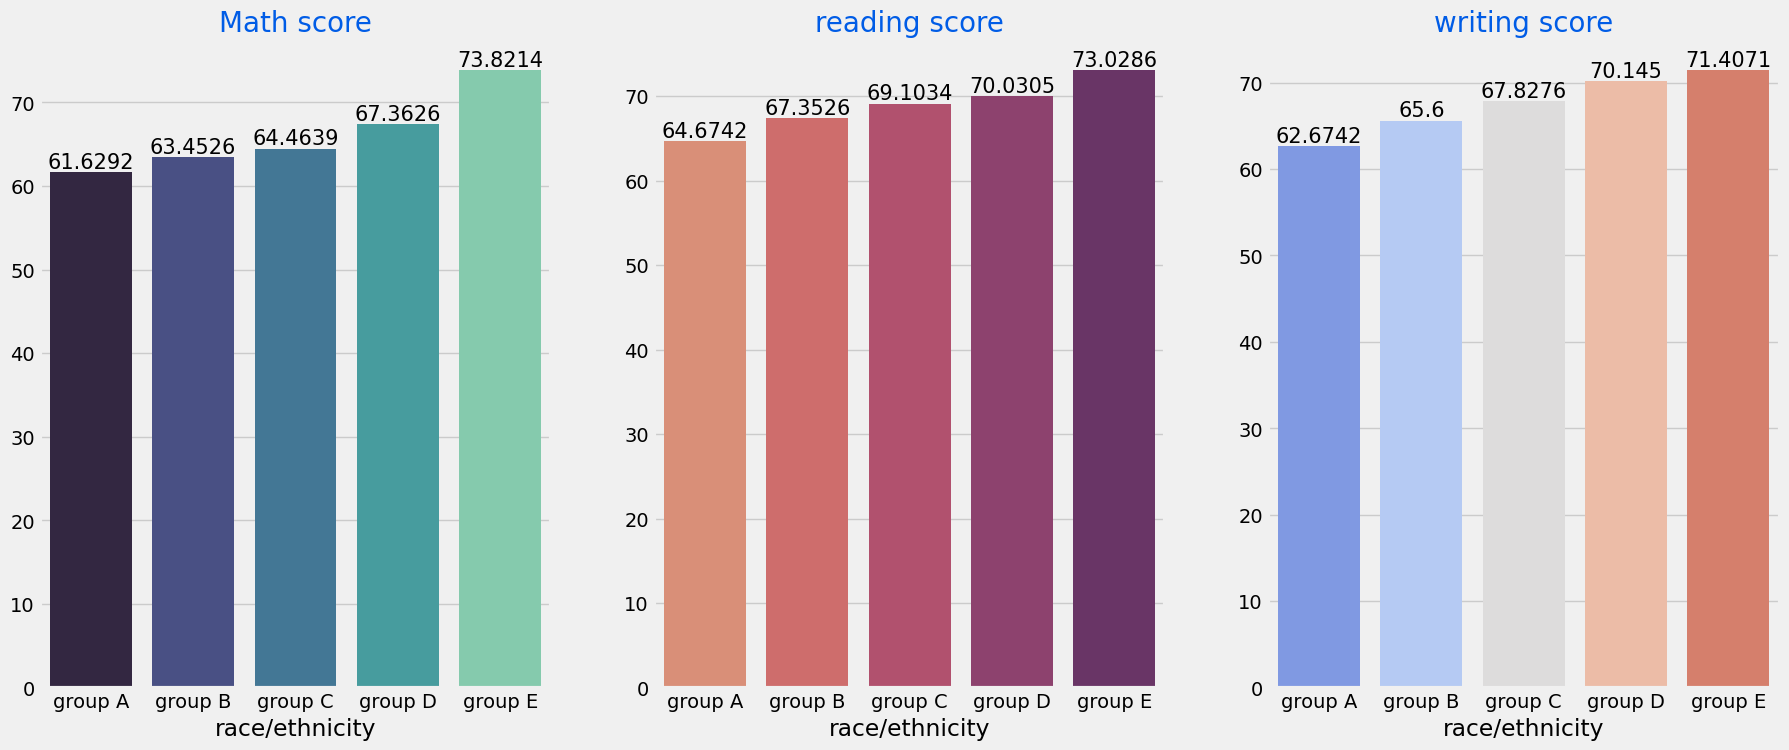

In [54]:
groupData=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=groupData['math score'].mean().index,y=groupData['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=groupData['reading score'].mean().index,y=groupData['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=groupData['writing score'].mean().index,y=groupData['writing score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)






<span style="font-size: 16pt;">Insights</span>


1.Group E students has scored highest marks<br>
2.Group A students have scored lowest marks

<span style="font-size: 16pt;">4.4.3 PARENTAL LEVEL OF EDUCATION</span>


1.What is educational background of students parent?<br>
2.is Parental education has any impact on students performance>


<span style="font-size: 16pt;">UNIVARIATE ANALISYS(What is educational background of student's parent?)</span>


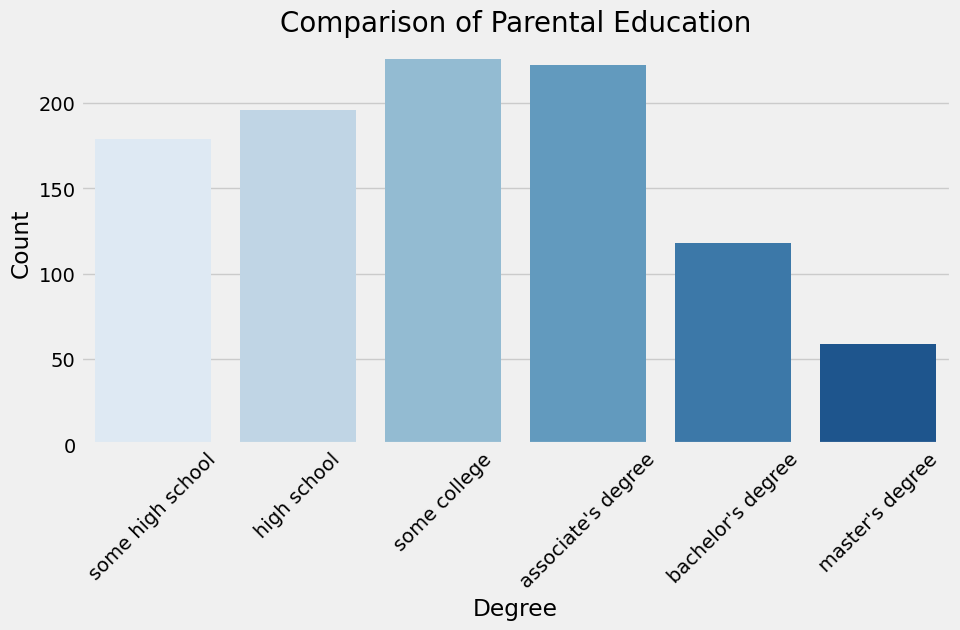

In [67]:
plt.rcParams['figure.figsize'] = (10 ,5)
plt.style.use('fivethirtyeight')

# Create a mapping of parental education levels to numeric values
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

# Apply the mapping to the 'parental level of education' column
df['education_numeric'] = df['parental level of education'].map(education_mapping)

# Create the countplot using the new numeric column
sns.countplot(data=df, x='education_numeric', palette='Blues')

# Customize plot labels and title
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Set x-axis tick labels based on the mapping
plt.xticks(ticks=range(6), labels=education_mapping.keys(), rotation=45)

plt.show()


<span style="font-size: 16pt;">Insights</span>


1.Largest Number of parents are from some college

<span style="font-size: 16pt;">BIVARITE ANALISYS (Is Parental education has any impact on students performance?)</span>


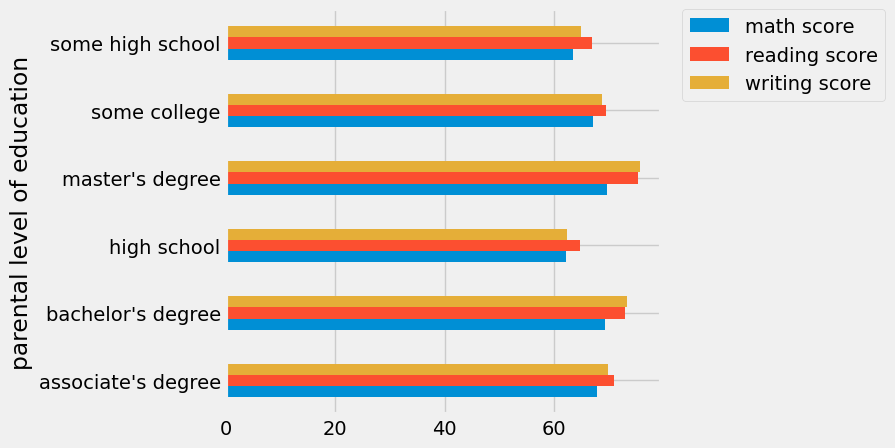

In [70]:
numeric_columns = ['math score', 'reading score', 'writing score']

df.groupby('parental level of education')[numeric_columns].mean().plot(kind='barh', figsize=(5, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


<span style="font-size: 16pt;">Insights</span>


1.The score of students whose parents possess master and bachelor's level of education are higher than others

<span style="font-size: 16pt;">4.4.4 LUNCH COLUMN</span>


1.which type lunch is most common amoung students?<br>
2.what si the effect of lunch types on test results?

<span style="font-size: 16pt;">UNIVARIATE ANALISYS(Which type of lunch os most common amoung students?)</span>


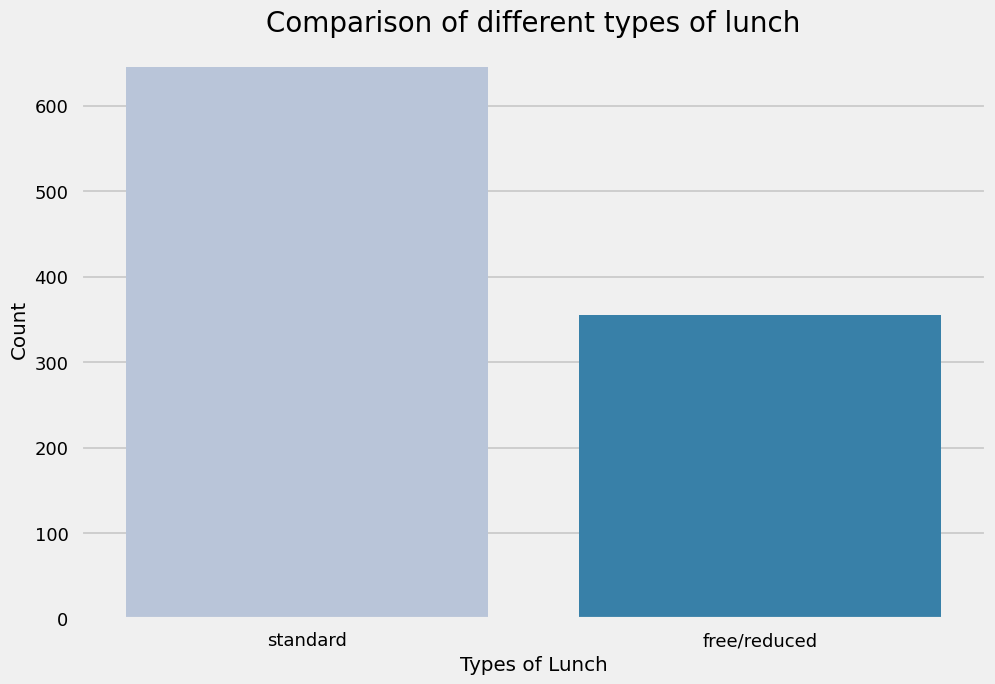

In [75]:
plt.rcParams['figure.figsize']=(5,5)
plt.style.use('seaborn-talk')
sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()


<span style="font-size: 16pt;">Insights</span>


1.students being served standard lunch was more than free lunch

<span style="font-size: 16pt;">BIVARIATE ANALISYS(Is lunch type intake has any impact on student's Performance?)</span>


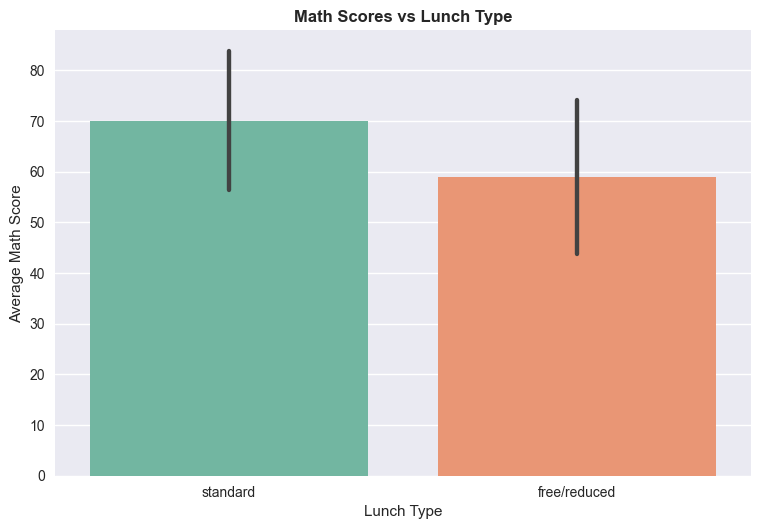

In [77]:
plt.rcParams['figure.figsize']=(8,5)
plt.style.use('seaborn')
sns.barplot(data=df, x='lunch', y='math score', ci='sd', palette='Set2')
plt.title('Math Scores vs Lunch Type', fontweight='bold')
plt.xlabel('Lunch Type')
plt.ylabel('Average Math Score')
plt.show()



<span style="font-size: 16pt;">4.4.5 TEST PREPARATION COURSE COLUMN</span>


<span style="font-size: 16pt;">UNIVARIATE ANALYSYS</span>


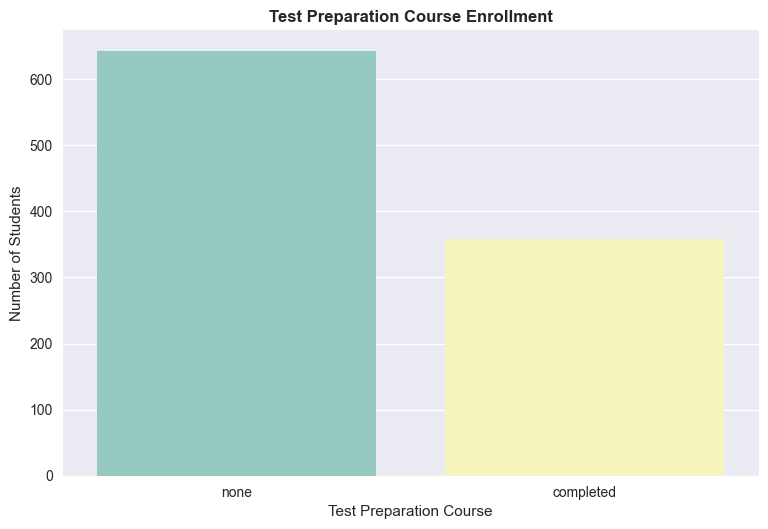

In [83]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('seaborn')
sns.countplot(data=df, x='test preparation course', palette='Set3')
plt.title('Test Preparation Course Enrollment', fontweight='bold')
plt.xlabel('Test Preparation Course')
plt.ylabel('Number of Students')
plt.show()


<span style="font-size: 16pt;">BIVARIATE ANALYSYS(is test prepartion course has any impact on student's perfromance)</span>


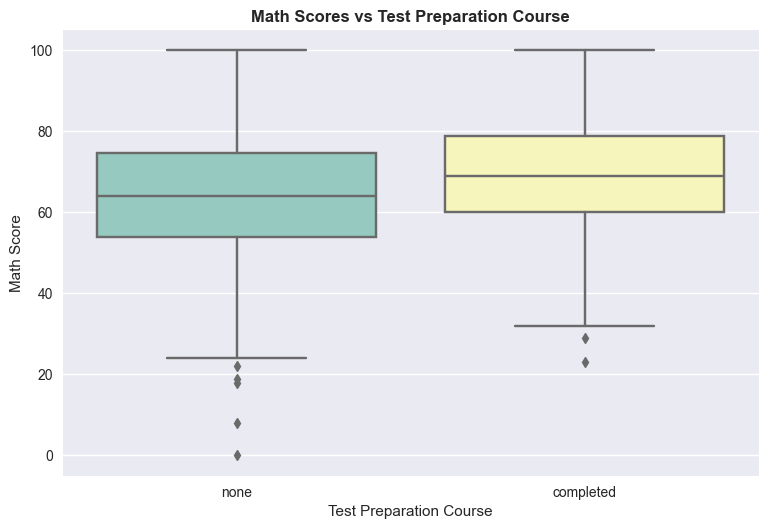

In [85]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')
sns.boxplot(data=df, x='test preparation course', y='math score', palette='Set3')
plt.title('Math Scores vs Test Preparation Course', fontweight='bold')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.show()


<span style="font-size: 16pt;">4.4.6 CHECKING OUTLIERS</span>


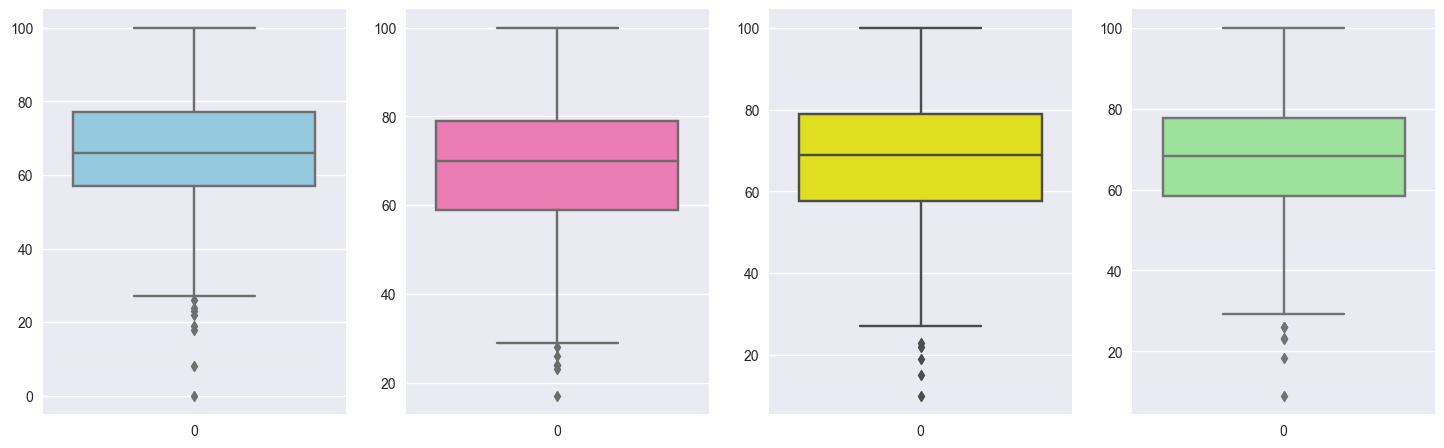

In [80]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()


<span style="font-size: 16pt;">4.4.6 MULTIVARIATE ANALYSYS USING PAIRPLOT</span>


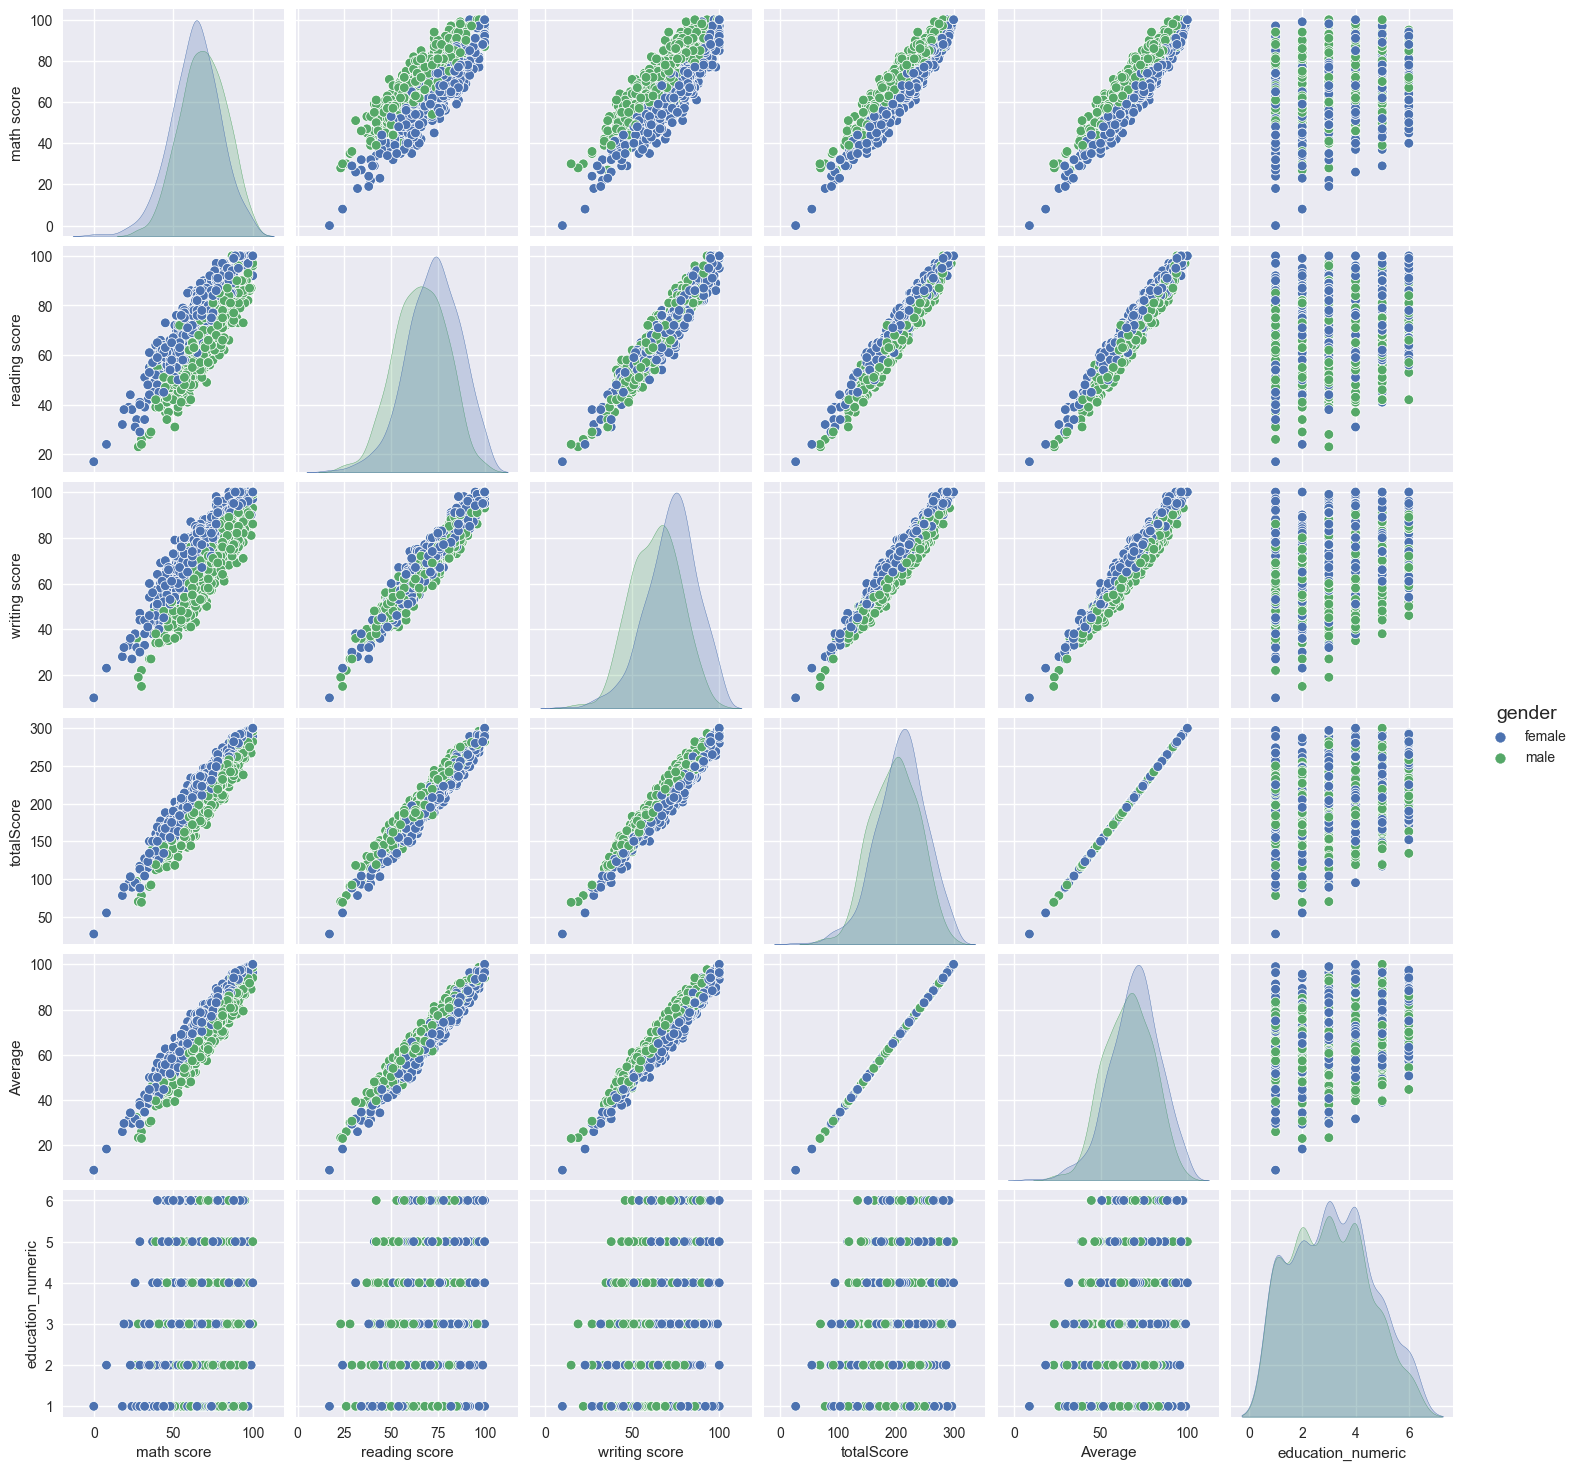

In [81]:
sns.pairplot(df,hue='gender')
plt.show()

<span style="font-size: 20pt;">Conclusion</span>


1.Student's Performance is related with lunch,race,parental level of education<br>
2.Female lead in pass percentahe and also are top-scorers<br>
3.Student's Perfromance is not related with test preparation course<br>
4.Finishing preparation is beneficial